## Conclution: - if use Bollinger Bands

#### huge increase in price example: - *might not as much gain as holding the entire time* 

we gain about 60% in TSLA, where start price = 86.052002, end price = 447.369995

we gain about 15% in AAPL, where start price = 75.087502, end price = 131.399994

we gain about % in AMZN, where start price = , end price = 



#### huge increase in price example: - *might reduce lose*

we gain about -25% in AAL, where start price = 29.09, end price = 13.23     american airline

we gain about % in , where start price = , end price = 

we gain about % in , where start price = , end price = 

In [85]:
# import
import pandas as pd
import pandas.plotting as pdplt
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as pdr

%matplotlib inline

In [213]:
# get the historical data for Tasla
df = pdr.get_data_yahoo('AAL', '2010-01-01')

pd.concat([df.head(), df.tail()])

High    Low   Open  Close       Volume  Adj Close
Date                                                          
2010-01-04   4.94   4.66   4.84   4.77    9837300.0   4.496876
2010-01-05   5.37   4.71   4.79   5.31   25212000.0   5.005957
2010-01-06   5.38   5.00   5.19   5.09   16597900.0   4.798555
2010-01-07   5.43   5.05   5.06   5.24   14033400.0   4.939965
2010-01-08   5.43   5.06   5.27   5.14   12760000.0   4.845690
2020-08-27  14.26  13.12  13.43  13.28  108835700.0  13.280000
2020-08-28  13.63  13.23  13.59  13.59   54516400.0  13.590000
2020-08-31  13.74  13.05  13.60  13.05   45917200.0  13.050000
2020-09-01  13.84  12.66  12.86  13.10   72849700.0  13.100000
2020-09-02  13.34  12.67  12.94  13.23   57978018.0  13.230000

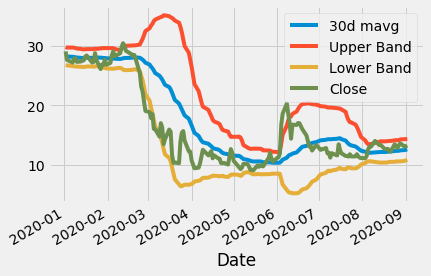

In [214]:
# 30 moving average
df['30d mavg'] = df['Close'].rolling(window=30).mean()

df['30d std'] = df['Close'].rolling(window=30).std()

df['Upper Band'] = df['30d mavg'] + (df['30d std'] * 2)
df['Lower Band'] = df['30d mavg'] - (df['30d std'] * 2)


# create a list of the column names we are interested in plotting

cols = ['30d mavg','Upper Band','Lower Band', 'Close']
        
df_Boll = df[cols]['2020']
df_Boll.plot()
plt.show()


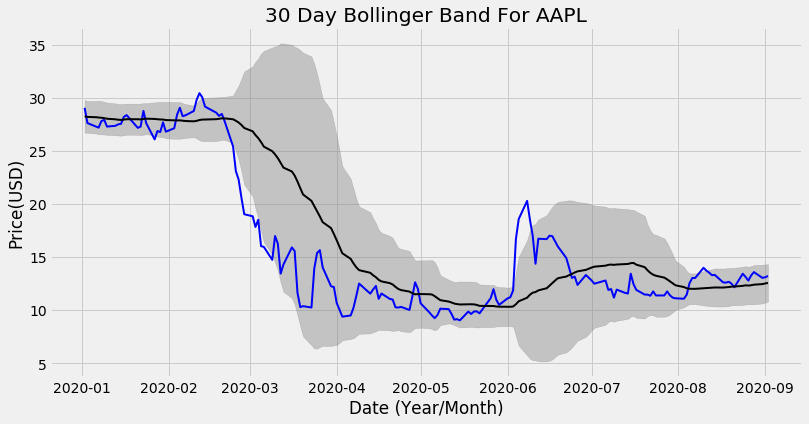

In [215]:

# set style, empty figure and axes
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

# Get index values for the X axis for the DataFrame
x_axis = df_Boll.index.get_level_values(0)

# Plot shaded 'win' Day Bollinger Band for Facebook
ax.fill_between(x_axis, 
                df_Boll['Upper Band'], 
                df_Boll['Lower Band'], 
                color='grey', alpha=0.4)

ax.plot(x_axis, df_Boll['Close'], color='blue', lw=2)
ax.plot(x_axis, df_Boll['30d mavg'], color='black', lw=2)

# Set Title & Show the Image
ax.set_title('30 Day Bollinger Band For AAPL')
ax.set_xlabel('Date (Year/Month)')
ax.set_ylabel('Price(USD)')

plt.show();

## investment strategie - Rollinger Band

logic: 
* cannot short sell 
* if buy, spend all holding money to buy 
* if sell, sell all holding stocks 

In [216]:
# init
df_invest = df_Boll = df[cols]['2020':]
amount = 0
money = 1   # join with 1 unit of money
start_date = '2020-01-02'
# start_price = df.loc['2020-01-02']['Close']

In [217]:
for index, row in df_invest.iterrows():
    print(index,'=============================')
    if (row['Close'] > row['Upper Band']):
        print('want to sell at ',row['Close'])
        money = money + amount*row['Close']
        amount = 0
        
    elif (row['Close'] < row['Lower Band']):
        print('want buy at ',row['Close'])
        amount = amount + money/row['Close']
        money = 0

    else:
        print('wait')

    print("amount ", amount, ' money ',money)
    

2020-01-02 00:00:00 =============================
wait
amount  0  money  1
2020-01-03 00:00:00 =============================
wait
amount  0  money  1
2020-01-06 00:00:00 =============================
wait
amount  0  money  1
2020-01-07 00:00:00 =============================
wait
amount  0  money  1
2020-01-08 00:00:00 =============================
wait
amount  0  money  1
2020-01-09 00:00:00 =============================
wait
amount  0  money  1
2020-01-10 00:00:00 =============================
wait
amount  0  money  1
2020-01-13 00:00:00 =============================
wait
amount  0  money  1
2020-01-14 00:00:00 =============================
wait
amount  0  money  1
2020-01-15 00:00:00 =============================
wait
amount  0  money  1
2020-01-16 00:00:00 =============================
wait
amount  0  money  1
2020-01-17 00:00:00 =============================
wait
amount  0  money  1
2020-01-21 00:00:00 =============================
wait
amount  0  money  1
2020-01-22 00:00:00 =====

In [218]:
end_value = amount*df_invest.loc[start_date]['Close'] + money

print('end stock holding ', amount)
print('end money holding ', money)
print('total value ', end_value)

end stock holding  0
end money holding  0.7508278869164958
total value  0.7508278869164958


#### huge increase in price example: - *might not as much gain as holding the entire time* 

we gain about 60% in TSLA, where start price = 86.052002, end price = 447.369995

we gain about 15% in AAPL, where start price = 75.087502, end price = 131.399994

we gain about % in AMZN, where start price = , end price = 



#### huge increase in price example: - *might reduce lose*

we gain about -25% in AAL, where start price = 29.09, end price = 13.23     american airline

we gain about % in , where start price = , end price = 

we gain about % in , where start price = , end price = 


In [219]:
pd.concat([df_invest.head(1), df_invest.tail(1)])

30d mavg  Upper Band  Lower Band  Close
Date                                               
2020-01-02    28.286   29.816892   26.755108  29.09
2020-09-02    12.576   14.340865   10.811135  13.23